# Measuring distance dependent frequency shift
- use the ZI do drive the piezo

In [1]:
#%matplotlib.widget
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data_dir = r'C:\Users\Characterization\B26_scanning_probe\data\221202_14_00_00_AFM\data\meas_plotter_20221202_135459.txt' 

In [17]:
d = np.loadtxt(data_dir, skiprows=7,delimiter=";")

In [4]:
 _i = np.where(d[:,0]==0)[0][0]
#print(_i)
_d = np.split(d,[_i+1],axis=0)
pz,df=_d
pz = np.asarray(pz).T
df = np.asarray(df).T

In [5]:
print(np.shape(df))
print(np.shape(pz))

(2, 13492)
(2, 13492)


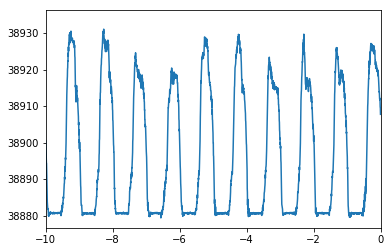

In [6]:
plt.plot(*df)
plt.xlim(-10,0)
plt.show()

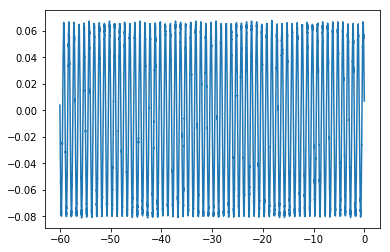

In [7]:
plt.plot(*pz)
plt.show()

## chop up sine into single ramps
- fit sine wave
- looking at maxima and minima

In [8]:
from scipy.optimize import curve_fit
def sine(t,a,period,d,offset):
    f = a*np.sin(2*np.pi*t/period+d)+offset
    return f

In [9]:
abs(pz[0].min()-pz[0].max())

59.9956333714

[-0.07162875  1.00000005 -0.18827931 -0.00732674]
period: 1.000000 s


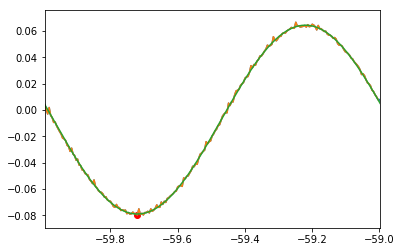

In [10]:
popt, pcov = curve_fit(sine,pz[0],pz[1],p0=(0.06,1,0,0))
print(popt)
fit_x = pz[0]
fit_y = sine(fit_x,*popt)

amp, period, d, offset =popt
print("period: %f s" %period)
t_measurement = abs(pz[0].min()-pz[0].max())
N_period = t_measurement/period

# find first minimum
n_period = int(len(pz[0])/N_period)
sec_1 = np.split(pz,[n_period],axis=1)[0]
i_min_1 = np.argmin(sec_1[1])

plt.plot(*pz)
plt.plot(*sec_1)
plt.plot(fit_x,fit_y)
plt.scatter(*sec_1[:,i_min_1],c="r")
plt.xlim(pz[0].min(),pz[0,n_period])
plt.show()

slice from index 62 to 286
62


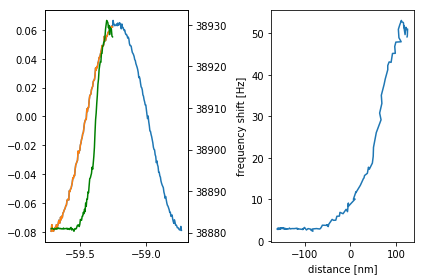

slice from index 286 to 510
287


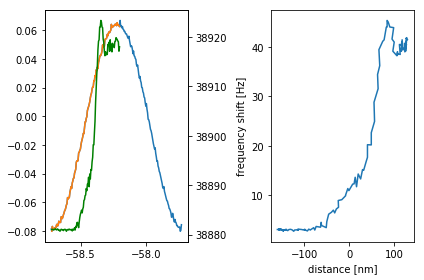

slice from index 510 to 734
511


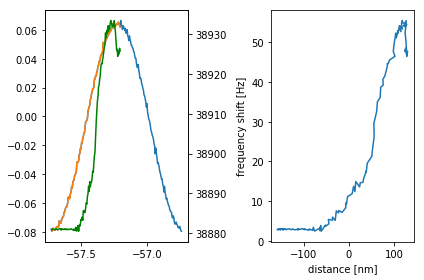

slice from index 734 to 958
741


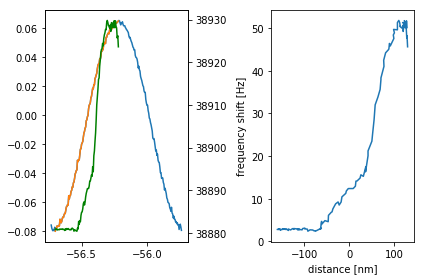

slice from index 958 to 1182
962


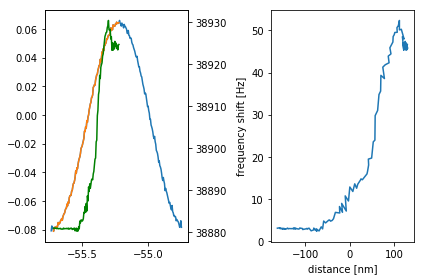

slice from index 1182 to 1406
1187


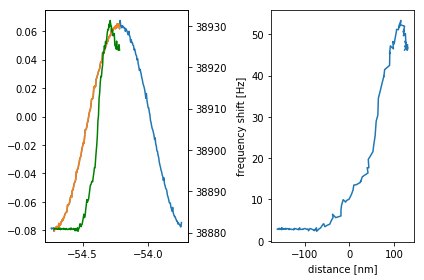

slice from index 1406 to 1630
1412


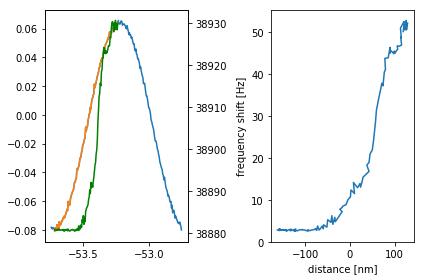

slice from index 1630 to 1854
1633


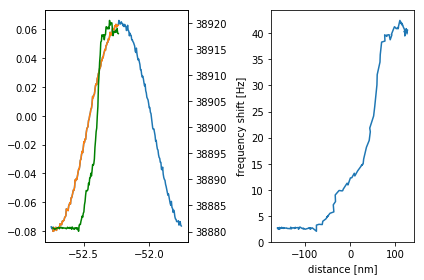

slice from index 1854 to 2078
1861


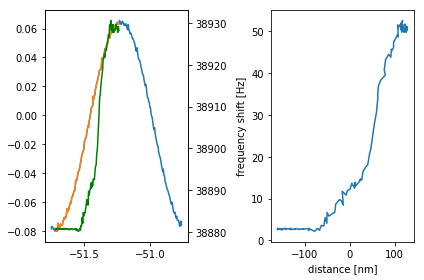

slice from index 2078 to 2302
2083


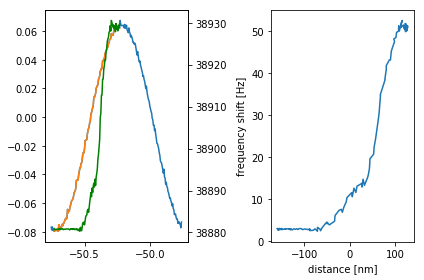

slice from index 2302 to 2526
2304


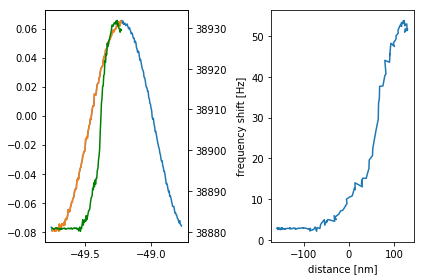

slice from index 2526 to 2750
2535


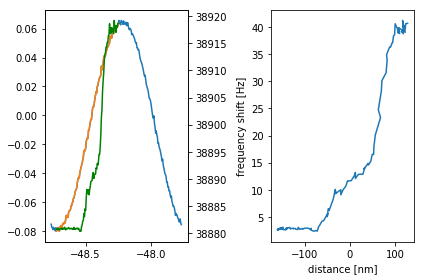

slice from index 2750 to 2974
2761


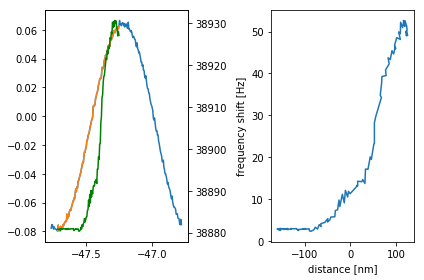

slice from index 2974 to 3198
2985


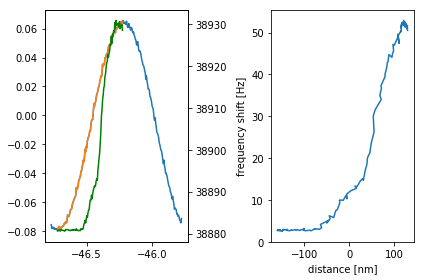

slice from index 3198 to 3422
3211


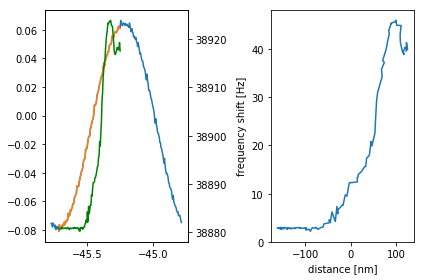

slice from index 3422 to 3646
3435


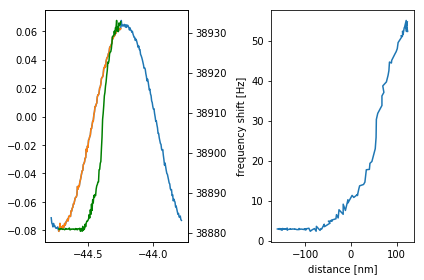

slice from index 3646 to 3870
3661


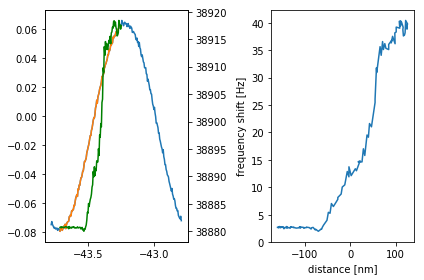

slice from index 3870 to 4094
3886


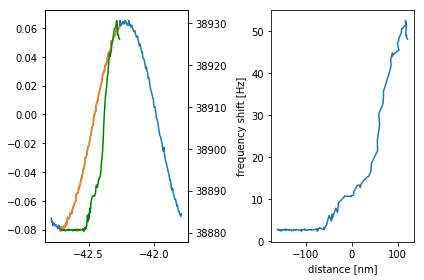

slice from index 4094 to 4318
4106


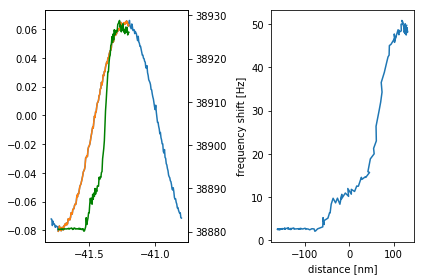

slice from index 4318 to 4542
4336


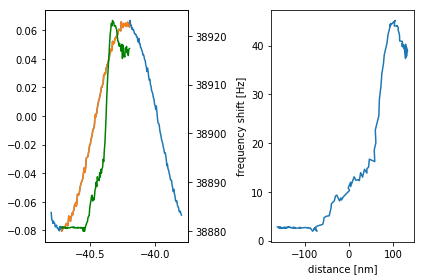

slice from index 4542 to 4766
4557


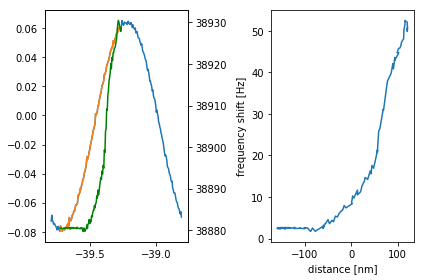

slice from index 4766 to 4990
4782


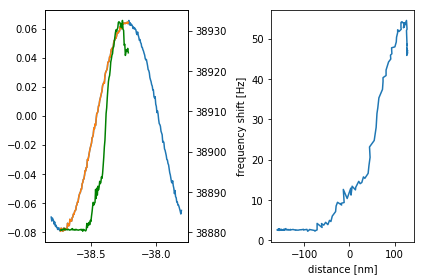

slice from index 4990 to 5214
5006


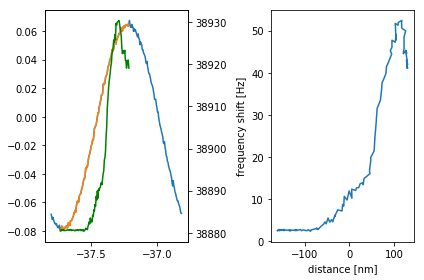

slice from index 5214 to 5438
5232


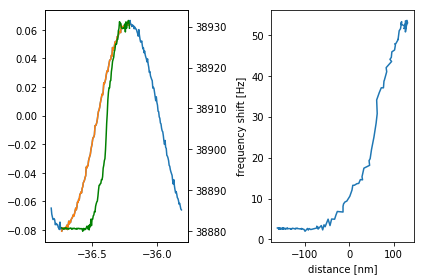

slice from index 5438 to 5662
5457


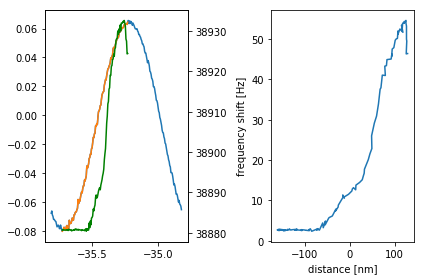

slice from index 5662 to 5886
5688


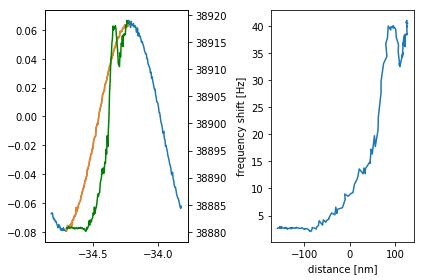

slice from index 5886 to 6110
5907


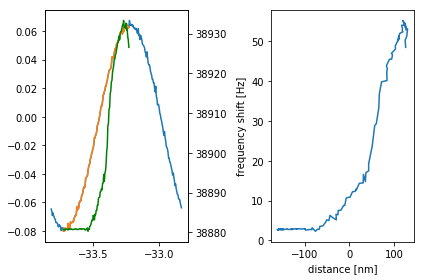

slice from index 6110 to 6334
6138


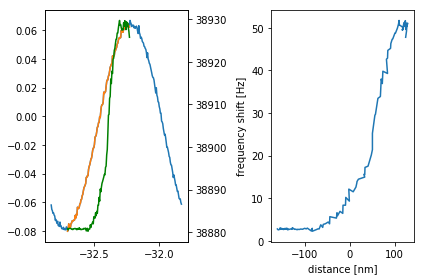

slice from index 6334 to 6558
6359


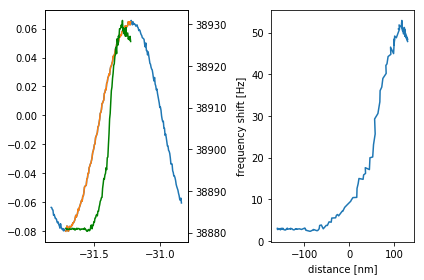

slice from index 6558 to 6782
6578


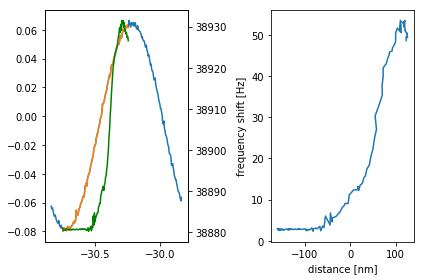

slice from index 6782 to 7006
6805


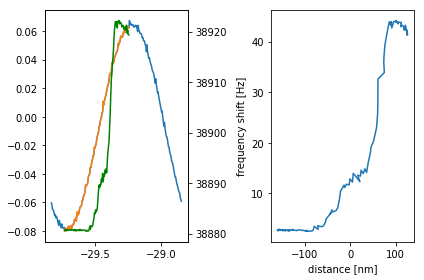

slice from index 7006 to 7230
7030


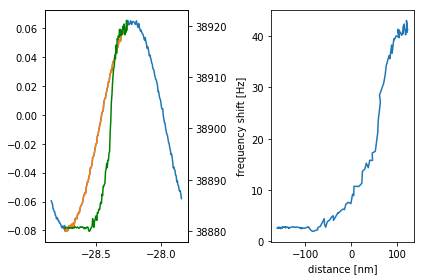

slice from index 7230 to 7454
7255


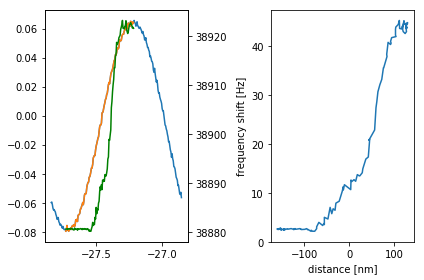

slice from index 7454 to 7678
7481


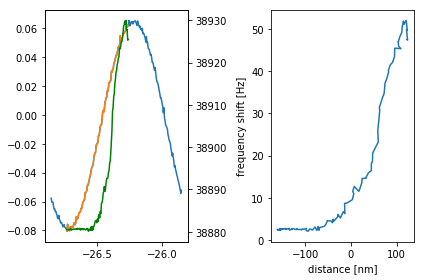

slice from index 7678 to 7902
7706


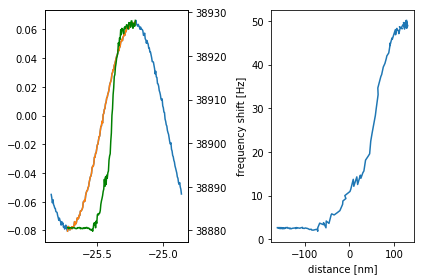

slice from index 7902 to 8126
7931


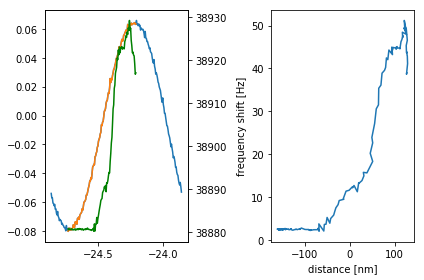

slice from index 8126 to 8350
8156


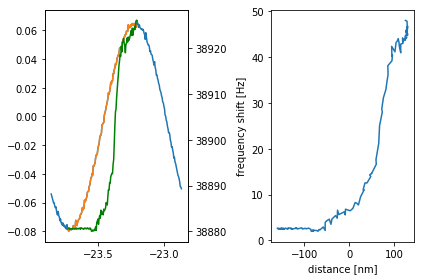

slice from index 8350 to 8574
8381


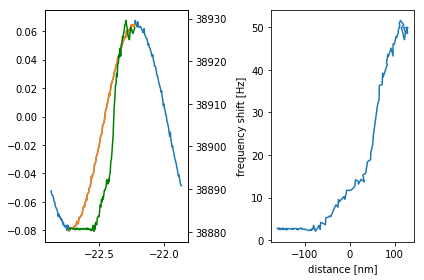

slice from index 8574 to 8798
8606


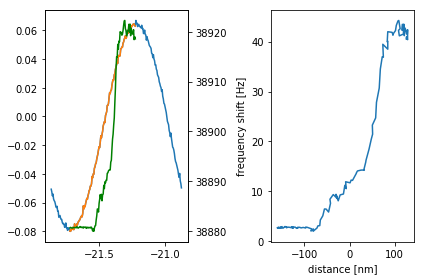

slice from index 8798 to 9022
8830


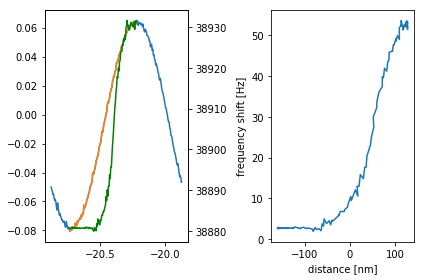

slice from index 9022 to 9246
9058


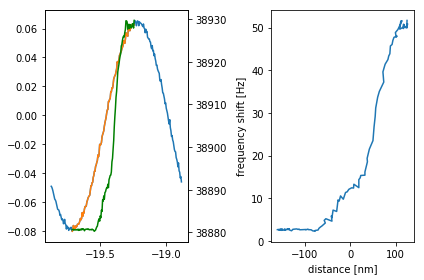

slice from index 9246 to 9470
9284


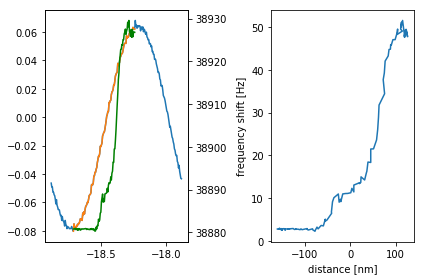

slice from index 9470 to 9694
9509


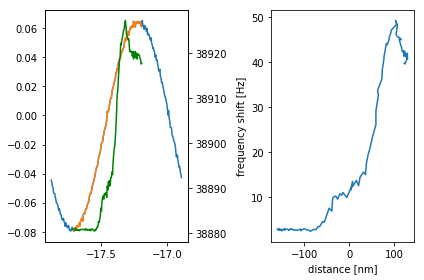

slice from index 9694 to 9918
9734


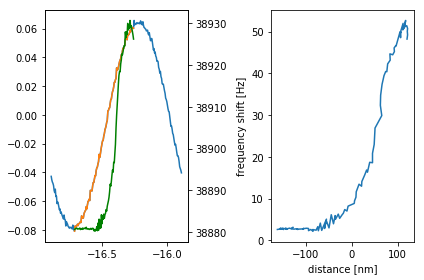

slice from index 9918 to 10142
9955


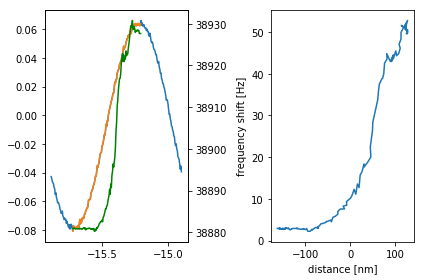

slice from index 10142 to 10366
10180


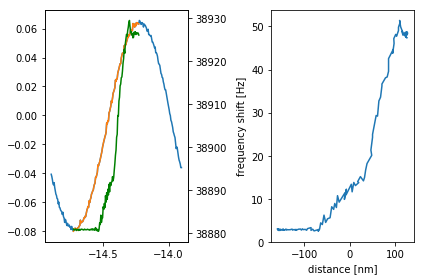

slice from index 10366 to 10590
10408


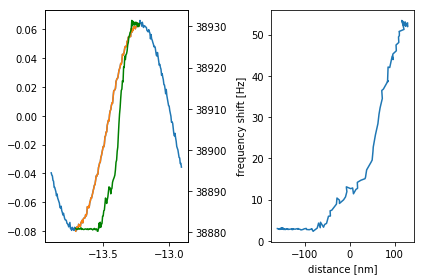

slice from index 10590 to 10814
10630


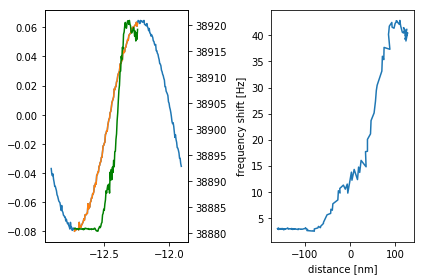

slice from index 10814 to 11038
10857


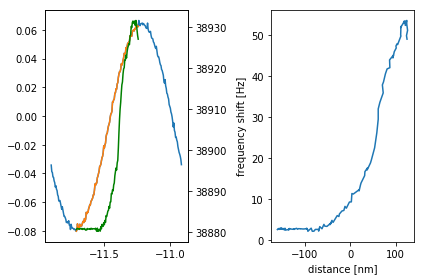

slice from index 11038 to 11262
11078


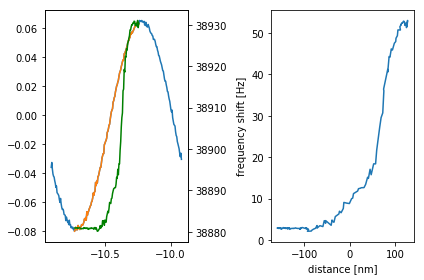

slice from index 11262 to 11486
11304


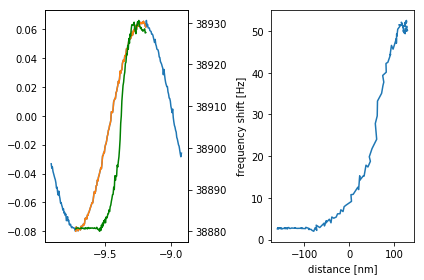

slice from index 11486 to 11710
11533


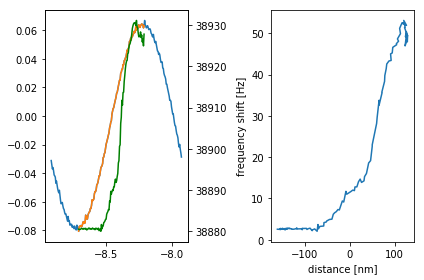

slice from index 11710 to 11934
11754


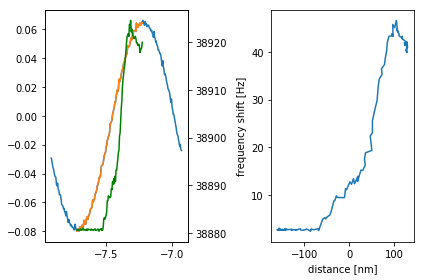

slice from index 11934 to 12158
11975


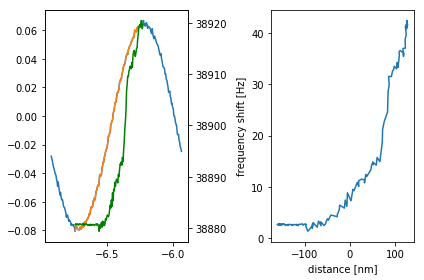

slice from index 12158 to 12382
12200


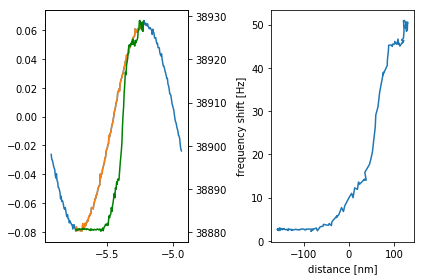

slice from index 12382 to 12606
12425


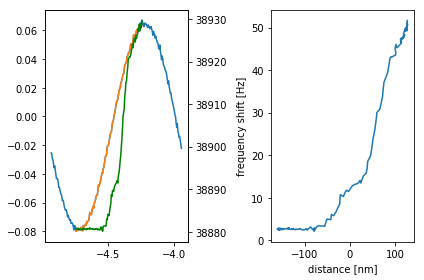

slice from index 12606 to 12830
12657


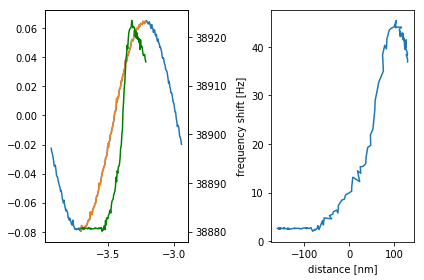

slice from index 12830 to 13054
12882


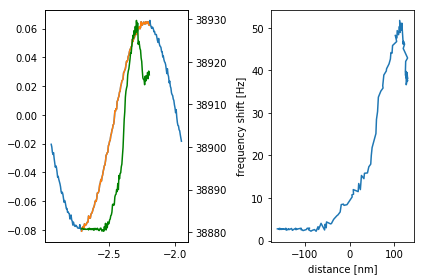

In [21]:
f_tip = 38.878e3 # frequency of tip
vz = 2e-6 # [m/V] the motion of the piezo per voltage
# chop signals into smaller ones
#f_sum, gx = plt.subplots()
summary =[]
for i in range(int(N_period)-1):
    a = int(i*n_period + i_min_1)
    b = int((i+1)*n_period+i_min_1)
    print("slice from index %i to %i" %(a,b))
    pz_seci = pz[:,a:b]

    f, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
    ax1.plot(*pz_seci)
    # find minimum
    i_min = np.argmin(pz_seci[1])
    i_max = np.argmax(pz_seci[1])
    # find corresponding minimum index of full array
    i_min_global = np.where(pz[0,:]==pz_seci[0,i_min])[0][0]
    i_max_global = np.where(pz[0,:]==pz_seci[0,i_max])[0][0]
    print(i_min_global)
    pz_sec = pz[:,i_min_global:i_max_global]
    ax1.plot(*pz_sec)
    # chop up df signal
    df_sec = df[:,i_min_global:i_max_global]
    ax1df = ax1.twinx()
    ax1df.plot(*df_sec,c="g")
    
    # correlate df and z
    f_shift = df_sec[1]-f_tip
    z = pz_sec[1]*vz*1e9 # in nanometer
    ax2.plot(z,f_shift)
    ax2.set_xlabel("distance [nm]")
    ax2.set_ylabel("frequency shift [Hz]")
    plt.tight_layout()
    plt.show()
    
    summary.append([z,f_shift])

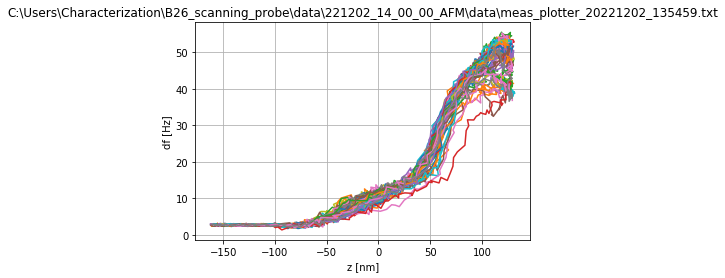

In [22]:
for data in summary:
    z,f = data
    plt.plot(z,f)
plt.grid()
plt.xlabel("z [nm]")
plt.ylabel("df [Hz]")
plt.title(data_dir)
plt.savefig(r'C:\Users\Characterization\B26_scanning_probe\data\221202_14_00_00_AFM\plots\df-z.png',dpi=300)
plt.show()